# Convolução circular $\times$ Convolução linear

Neste notebook exploramos aspectos sobre a convolução operada via DFT. Temos uma sequência $x[n]$ e $h[n]$, discretas e que correspondem aos sinais de entrada e a resposta ao impulso de um SLI. Neste caso, sabemos que:

\begin{equation}
Y(k) = X(k) \ H(k)
\tag{1}
\end{equation}
e

\begin{equation}
y[n] = IDFT\left\{Y(k)\right\}
\tag{2}
\end{equation}

In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
plt.rcParams.update({'font.size': 14})
from scipy import signal
import IPython.display as ipd # to play signals
import sounddevice as sd
import soundfile as sf

# Exemplo 1 - um caso bem simples

- Consideramos duas pequenas sequências de 3 amostras cada.
- Operamos a convolução linear (no domínio do tempo) usando np.convolve (Note que o número de amostras em $y[n]$ é $N=N_x+N_h-1$

y[n] tem 5 amostras


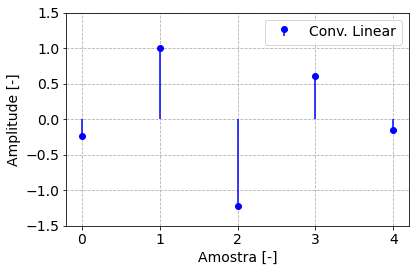

In [16]:
# sinal
xn = np.array([1.2, -0.8, 0.3])
# Resposta ao impulso
hn = np.array([-0.2, 0.7, -0.5])

# Convolução linear
yn = np.convolve(xn, hn) # ref
n = np.arange(len(yn))
print("y[n] tem {} amostras".format(len(yn)))

plt.figure()
plt.stem(n, yn, '-b', markerfmt = 'ob', label = "Conv. Linear", basefmt=" ", use_line_collection=  True)
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Amostra [-]')
plt.ylabel('Amplitude [-]')
plt.ylim((-1.5, 1.5))
plt.tight_layout()

## O que não está bem:

- Operamos a convolução circular (no domínio da frequência) usando np.fft.fft e operando a transformada inversa em $Y(k)$ (Note que o número de amostras em $y[n]$ é $N = N_x = N_h$

y[n] tem 3 amostras


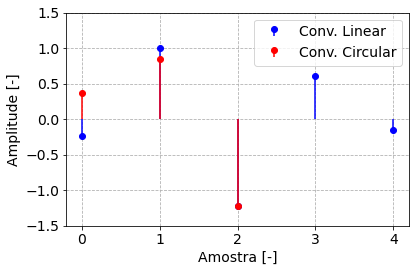

In [17]:
# DFTs
Xk = np.fft.fft(xn)
Hk = np.fft.fft(hn)
Yk = Xk * Hk
# IFFT
yn_c = np.fft.ifft(Yk)
nc = np.arange(len(yn_c))
print("y[n] tem {} amostras".format(len(yn_c)))

plt.figure()
plt.stem(n, yn, '-b', markerfmt = 'ob', label = "Conv. Linear", basefmt=" ", use_line_collection=  True)
plt.stem(nc, np.real(yn_c), '-r', markerfmt = 'or', label = "Conv. Circular", basefmt=" ", use_line_collection=  True)
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Amostra [-]')
plt.ylabel('Amplitude [-]')
plt.ylim((-1.5, 1.5))
plt.tight_layout()

## Correção com zero padding

- Operamos a convolução circular (no domínio da frequência) usando np.fft.fft, mas completando as sequências $x[n]$ e $h[n]$ com um número adequado de zeros;
- Lembre-se que para uma correta convolução devemos ter $N=N_x+N_h-1$;
- Forçamos as FFT's de $x[n]$ e $h[n]$ a ter este número de pontos;
- operamos a transformada inversa em $Y(k)$ (Note que, agora, o número de amostras em $y[n]$ é $N=N_x+N_h-1$

y[n] tem 5 amostras
Diferença [ 2.77555756e-17+0.j -1.11022302e-16+0.j  0.00000000e+00+0.j
 -1.11022302e-16+0.j -2.77555756e-17+0.j]


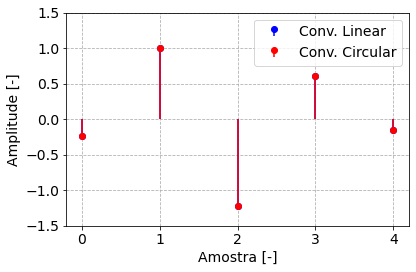

In [18]:
# DFTs
N = len(xn)+len(hn)-1

Xk = np.fft.fft(xn, N)
Hk = np.fft.fft(hn, N)
Yk = Xk * Hk
# IFFT
yn_l = np.fft.ifft(Yk)
nl = np.arange(len(yn_l))
print("y[n] tem {} amostras".format(len(yn_l)))
print("Diferença {}".format(yn_l-yn))


plt.figure()
plt.stem(n, yn, '-b', markerfmt = 'ob', label = "Conv. Linear", basefmt=" ", use_line_collection=  True)
plt.stem(nl, np.real(yn_l), '-r', markerfmt = 'or', label = "Conv. Circular", basefmt=" ", use_line_collection=  True)
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Amostra [-]')
plt.ylabel('Amplitude [-]')
plt.ylim((-1.5, 1.5))
plt.tight_layout()

# Exemplo 2 - Convolução com a resposta ao impulso de uma sala

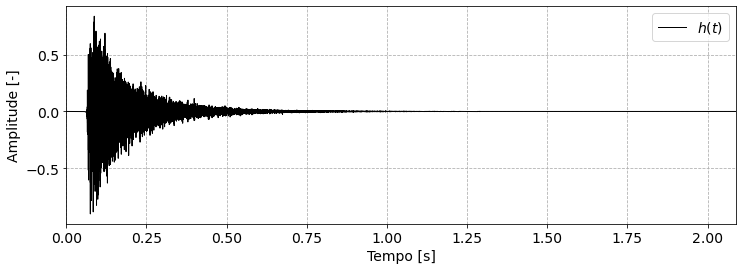

In [19]:
##### h(t) #################
hg, Fs = sf.read('ht.wav')
ht = hg[:,0]
time_h = np.linspace(0, (len(ht)-1)/Fs, len(ht))

plt.figure(figsize=(12, 4))
plt.plot(time_h, ht, '-k', linewidth = 1, label = r'$h(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, time_h[-1]))

ipd.Audio(ht, rate=Fs) # load a NumPy array

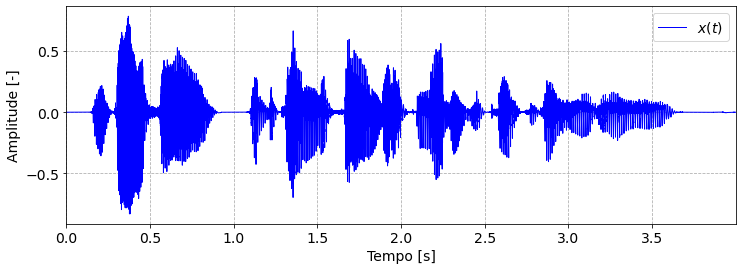

In [20]:
##### x(t) #################
xg, Fs = sf.read('voice.wav')

xt = xg[:4*Fs]
time_x = np.linspace(0, (len(xt)-1)/Fs, len(xt))

plt.figure(figsize=(12, 4))
plt.plot(time_x, xt, '-b', linewidth = 1, label = r'$x(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, time_x[-1]))

ipd.Audio(xt, rate=Fs) # load a NumPy array

## Um erro comum

consiste em operar as DFT's com o número de amostras de um dos sinais. O resultado dependerá do número de amostras utilizado.

- se você usar $\mathrm{max}(N)$, então um dos sinais manterá a resolução original e o outro será completado com zeros
- se você usar $\mathrm{min}(N)$, então um dos sinais manterá a resolução original e o outro será truncado

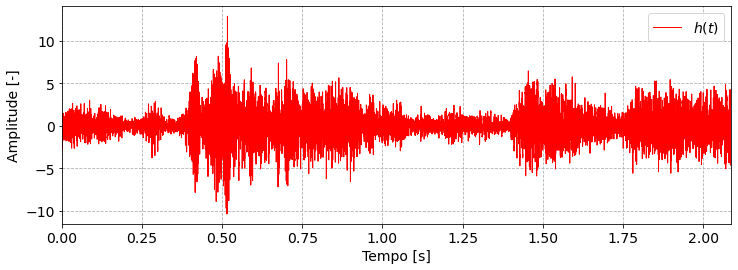

In [22]:
# Um Erro comum
N = len(xt)

Xk = np.fft.fft(xt, N) # Este tem a resolução original
Hk = np.fft.fft(ht, N)
Yk = (Xk * Hk)
yt = np.real(np.fft.ifft(Yk))
time_y = np.linspace(0, (len(yt)-1)/Fs, len(yt))

plt.figure(figsize=(12, 4))
plt.plot(time_y, yt, '-r', linewidth = 1, label = r'$h(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, time_y[-1]))

ipd.Audio(yt, rate=Fs) # load a NumPy array

## Correção com zero padding

- Operamos a convolução circular (no domínio da frequência) usando np.fft.fft, mas completando as sequências $x[n]$ e $h[n]$ com um número adequado de zeros;
- Lembre-se que para uma correta convolução devemos ter $N=N_x+N_h-1$;
- Forçamos as FFT's de $x[n]$ e $h[n]$ a ter este número de pontos;
- operamos a transformada inversa em $Y(k)$ (Note que, agora, o número de amostras em $y[n]$ é $N=N_x+N_h-1$

Note que o início e o final do sinal estão corretamente ajustados.

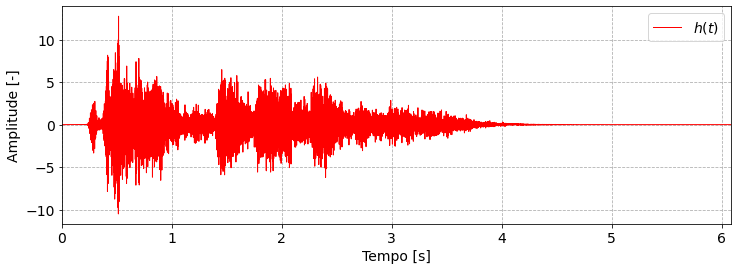

In [23]:
# O jeito correto
N = len(ht)+len(xt)-1
Xk = np.fft.fft(xt, N)
Hk = np.fft.fft(ht, N)
Yk = (Xk * Hk)
yt = np.real(np.fft.ifft(Yk))
time_y = np.linspace(0, (len(yt)-1)/Fs, len(yt))

plt.figure(figsize=(12, 4))
plt.plot(time_y, yt, '-r', linewidth = 1, label = r'$h(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, time_y[-1]))

ipd.Audio(yt, rate=Fs) # load a NumPy array